In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import operator
import math

In [3]:
user_file = 'res/small/user_demo.csv'

In [4]:
users = pd.read_csv(user_file)

In [4]:
for i in users:
    print(i)

print(len(users['userId']))

Unnamed: 0
userId
userGender
userAge
userAgeParsed
userJob
userJobParsed
userZip
500


In [5]:
X = np.zeros(shape=(500,3))

In [13]:
for i in range(500):
    if users['userGender'][i] == 'M':
        X[i][0] = 0
    else:
        X[i][0] = 1
    X[i][1] = users['userAge'][i]
    X[i][2] = users['userJob'][i]

In [47]:
kmean = KMeans(n_clusters=8, random_state=0).fit(X)

In [48]:
kmean

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [55]:
kmean.predict(np.array([0,25,20]).reshape(1,-1))

array([2])

In [5]:
# Gender frequency
count_m = 0
count_f = 0

genders = list(users['userGender'])

for i in range(500):
    if genders[i] == 'M':
        count_m += 1
    else:
        count_f += 1

print(count_m, count_f)

354 146


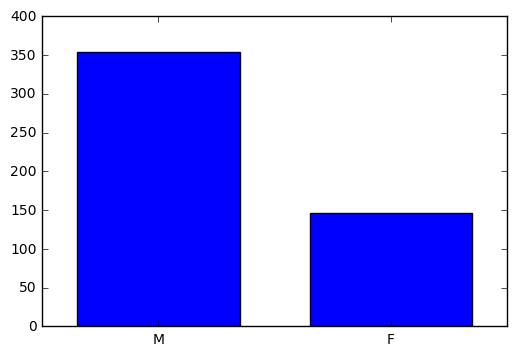

In [6]:
plt.bar([0.15,1.15],[count_m,count_f],width=0.7, tick_label=['M','F'])
plt.xticks([0.5,1.5])
plt.show()

In [7]:
# Age Frequencies
count_ages = [0,0,0,0,0,0,0]

ages = list(users['userAge'])
#print(ages)

for i in range(500):
    if ages[i] == 1:
        count_ages[0] += 1
    elif ages[i] == 18:
        count_ages[1] += 1
    elif ages[i] == 25:
        count_ages[2] += 1
    elif ages[i] == 35:
        count_ages[3] += 1
    elif ages[i] == 45:
        count_ages[4] += 1
    elif ages[i] == 50:
        count_ages[5] += 1
    elif ages[i] == 56:
        count_ages[6] += 1

print(count_ages)

[15, 123, 149, 98, 49, 35, 31]


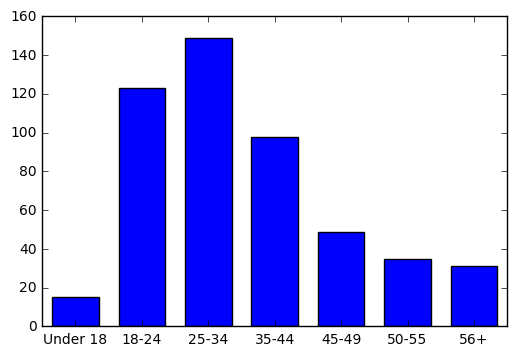

In [8]:
x_pos = [i+0.15 for i in range(7)]
plt.bar(x_pos, count_ages, width=0.7)
labels = ('Under 18', '18-24', '25-34', '35-44', '45-49', '50-55', '56+')
plt.xticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5], labels)
plt.show()

In [9]:
# Occupation frequency

count_job = [0 for i in range(21)]

jobs = list(users['userJob'])

for i in range(500):
    count_job[int(jobs[i])] += 1
    
print(count_job)

[54, 49, 20, 22, 68, 6, 10, 50, 1, 8, 20, 16, 37, 9, 18, 8, 21, 49, 7, 7, 20]


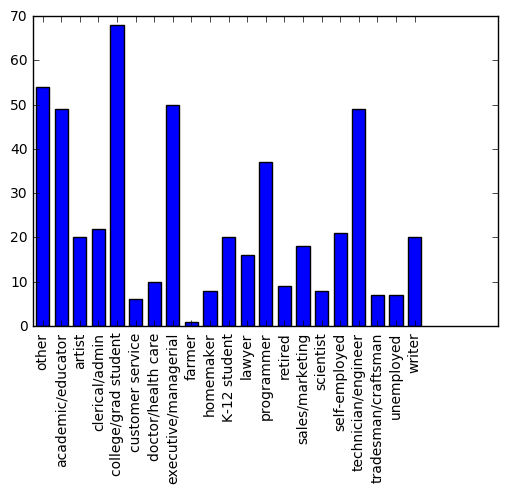

In [10]:
x_pos = [i+0.15 for i in range(21)]
x_tick = [i+0.5 for i in range(21)]
labels = (
    "other","academic/educator","artist","clerical/admin","college/grad student","customer service",
    "doctor/health care","executive/managerial","farmer","homemaker","K-12 student","lawyer",
    "programmer","retired","sales/marketing","scientist","self-employed","technician/engineer",
	"tradesman/craftsman","unemployed","writer")

plt.bar(x_pos, count_job, width=0.7)
plt.xticks(x_tick, labels, rotation='vertical')
plt.show()

In [11]:
m_file = 'res/pickles/movieInfo.pickle'
r_file = 'res/small/ratings.csv'
u_file = 'res/small/user_demo.csv'

In [12]:
movies = pd.read_pickle(m_file)
ratings = pd.read_csv(r_file)
users = pd.read_csv(u_file)

In [13]:
num_movies = len(movies['movieId'])
num_users = len(users['userId'])
num_rates = len(ratings['rating'])

print(num_movies, num_users, num_rates)

3883 500 73871


In [14]:
movieDict = {}
for i in range(num_movies):
    movieDict[int(movies['movieId'][i])] = i

In [15]:
revMovieDict = {}
for key, val in movieDict.items():
    revMovieDict[val] = key

In [16]:
movieTitleDict = {}
for i in range(num_movies):
    movieTitleDict[int(movies['movieId'][i])] = i
    movieTitleDict[int(movies['movieId'][i])] = movies['movieTitle'][i]

In [17]:
## dividing on basis of job
num_jobs = 21 # 0 to 20

jobAvgs = [np.zeros(shape=(num_movies, 6)) for i in range(num_jobs)]

jobsDF = users.sort_values(by='userJob')
jobIds = {}
for i in range(len(jobsDF['userId'])):
    jobIds[int(jobsDF['userId'][i])] = int(jobsDF['userJob'][i])

for i in range(num_rates):
    id = int(ratings['userId'][i])
    job = jobIds[id]
    rate = int(ratings['rating'][i])
    mId = movieDict[(ratings['movieId'][i])]
    jobAvgs[job][mId][rate-1] += 1

In [18]:
for job in range(num_jobs):
    for i in range(num_movies):
        avg, sum = 0, 0
        for j in range(5):
            sum += jobAvgs[job][i][j]
            avg += jobAvgs[job][i][j]*(j+1)
        if sum == 0:
            jobAvgs[job][i][5] = 0
        else:
            jobAvgs[job][i][5] = avg/sum

In [19]:
## dividing on basis of age
num_age = 7

age_dict = {
    1: 0,
    18: 1,
    25: 2,
    35: 3,
    45: 4,
    50: 5,
    56: 6
}

ageAvg = [np.zeros(shape=(num_movies, 6)) for i in range(num_age)]

ageDF = users.sort_values(by='userAge')

ageIds = {}
for i in range(len(ageDF['userId'])):
    ageIds[int(ageDF['userId'][i])] = age_dict[int(ageDF['userAge'][i])]

for i in range(num_rates):
    id = int(ratings['userId'][i])
    age = ageIds[id]
    rate = int(ratings['rating'][i])
    mId = movieDict[(ratings['movieId'][i])]
    ageAvg[age][mId][rate-1] += 1

In [20]:
for age in range(num_age):
    for i in range(num_movies):
        avg, sum = 0, 0
        for j in range(5):
            sum += ageAvg[age][i][j]
            avg += ageAvg[age][i][j]*(j+1)
        if sum == 0:
            ageAvg[age][i][5] = 0
        else:
            ageAvg[age][i][5] = avg/sum

In [21]:
## dividing on basis of gender

gender_dict = {
    'M': 0,
    'F': 1
}

genderAvg = [np.zeros(shape=(num_movies, 6)) for i in range(2)]

genderDF = users.sort_values(by='userGender')

genderIds = {}
for i in range(len(genderDF['userId'])):
    genderIds[int(genderDF['userId'][i])] = gender_dict[genderDF['userGender'][i]]

for i in range(num_rates):
    id = int(ratings['userId'][i])
    gender = genderIds[id]
    rate = int(ratings['rating'][i])
    mId = movieDict[(ratings['movieId'][i])]
    genderAvg[gender][mId][rate-1] += 1

In [22]:
for gender in range(2):
    for i in range(num_movies):
        avg, sum = 0, 0
        for j in range(5):
            sum += genderAvg[gender][i][j]
            avg += genderAvg[gender][i][j]*(j+1)
        if sum == 0:
            genderAvg[gender][i][5] = 0
        else:
            genderAvg[gender][i][5] = avg/sum

In [87]:
## providing prediction

currentUser = 119
user = users[ users['userId'] == 119]
uGender = list(user['userGender'])[0]
uAge = list(user['userAge'])[0]
uJob = list(user['userJob'])[0]

In [90]:
uGender = gender_dict[uGender]
uAge = age_dict[uAge]

In [100]:
gList = genderAvg[uGender]
aList = ageAvg[uAge]
jList = jobAvgs[uJob]

In [112]:
gRates, jRates, aRates = {}, {}, {}
avgRates = {}
for i in range(num_movies):
    gRates[i] = gList[i][5]
    jRates[i] = jList[i][5]
    aRates[i] = aList[i][5]
    avgRates[i] = (gRates[i]+jRates[i]+aRates[i])/3

In [113]:
gRates = sorted(gRates.items(), key=operator.itemgetter(1), reverse=True)
jRates = sorted(jRates.items(), key=operator.itemgetter(1), reverse=True)
aRates = sorted(aRates.items(), key=operator.itemgetter(1), reverse=True)
avgRates = sorted(avgRates.items(), key=operator.itemgetter(1), reverse=True)

In [126]:
num_recommend = 10

for i in avgRates[:num_recommend]:
    mId, rating = i[0], i[1]
    movieId = revMovieDict[mId]
    title = movieTitleDict[movieId]
    print(title, rating)

Hackers (1995) 5.0
Blown Away (1994) 5.0
Gold Diggers: The Secret of Bear Mountain (1995) 5.0
Long Kiss Goodnight, The (1996) 5.0
Jaws 2 (1978) 5.0
Dante's Peak (1997) 5.0
Simon Birch (1998) 5.0
Corruptor, The (1999) 5.0
Way of the Gun, The (2000) 5.0
Usual Suspects, The (1995) 4.89523809524


In [23]:
genderAvg

[array([[  0.        ,   7.        ,  24.        ,  42.        ,
          44.        ,   4.05128205],
        [  4.        ,   8.        ,  16.        ,  13.        ,
           7.        ,   3.22916667],
        [  3.        ,   3.        ,  13.        ,   6.        ,
           5.        ,   3.23333333],
        ..., 
        [  0.        ,   0.        ,   1.        ,   2.        ,
           0.        ,   3.66666667],
        [  0.        ,   0.        ,   0.        ,   0.        ,
           2.        ,   5.        ],
        [  2.        ,   1.        ,   3.        ,   8.        ,
           6.        ,   3.75      ]]),
 array([[  0.        ,   1.        ,   6.        ,  22.        ,
          18.        ,   4.21276596],
        [  0.        ,   2.        ,   4.        ,   6.        ,
           2.        ,   3.57142857],
        [  1.        ,   1.        ,   4.        ,   3.        ,
           1.        ,   3.2       ],
        ..., 
        [  0.        ,   0.        ,   2.  